In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style="whitegrid",palette='pastel')

### Plots with the modified datasets 

In [2]:
columns = ['is_booking','is_mobile','is_package','user_location_country',
           'hotel_cluster','posa_continent','hotel_continent','hotel_country',
           'channel','srch_ci_mm','srch_ci_season','srch_ppl_cnt',
           'stay_duration_day','dow']

train_data = pd.read_csv('data/train_clean_mod_dow.csv', delimiter=',',usecols=columns)
booked = pd.read_csv('data/train_clean_booked_dow.csv', delimiter=',',usecols=columns)

Bookings:		 1985514
Clicks:			 22132380
With mobile:		 3297251
Not mobile:		 20820643
Without package:	 18233135
With package:		 5884759


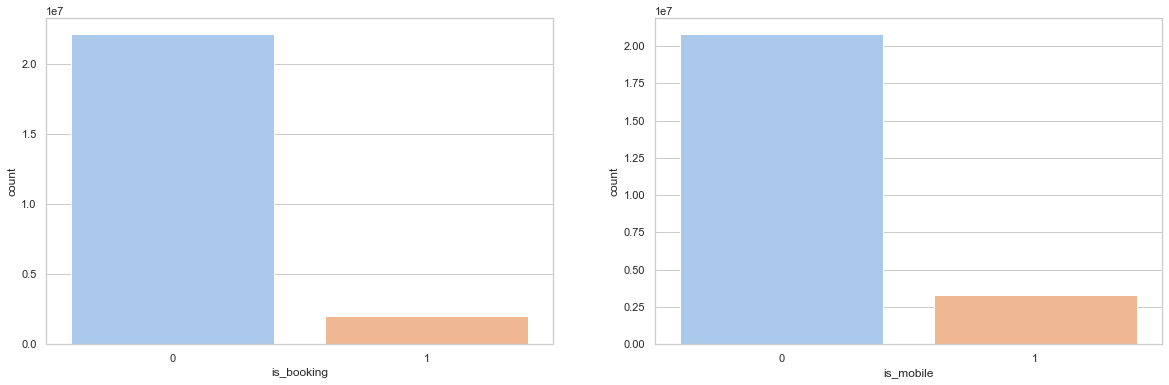

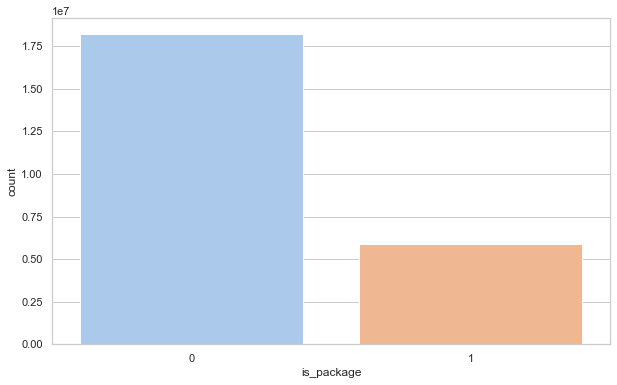

In [3]:
fig, ((axis1,axis2)) = plt.subplots(1,2,figsize=(20,6))

sns.countplot(train_data['is_booking'],ax=axis1)
sns.countplot(train_data['is_mobile'],ax=axis2)

plt.savefig('plots/is_booking_mobile.jpg',bbox_inches='tight')


plt.figure(figsize=(10,6))
sns.countplot(train_data['is_package'])
plt.savefig('plots/is_package.jpg',bbox_inches='tight')


print("Bookings:\t\t", len(train_data[train_data['is_booking'].isin([1])])) 
print("Clicks:\t\t\t", len(train_data[train_data['is_booking'].isin([0])])) 

print("With mobile:\t\t", len(train_data[train_data['is_mobile'].isin([1])])) 
print("Not mobile:\t\t", len(train_data[train_data['is_mobile'].isin([0])])) 

print("Without package:\t", len(train_data[train_data['is_package'].isin([0])])) 
print("With package:\t\t", len(train_data[train_data['is_package'].isin([1])])) 

User country 66:	 1482408
User country 205:	 306674
Hotel country 50:	 1294956
Hotel country 198:	 164981


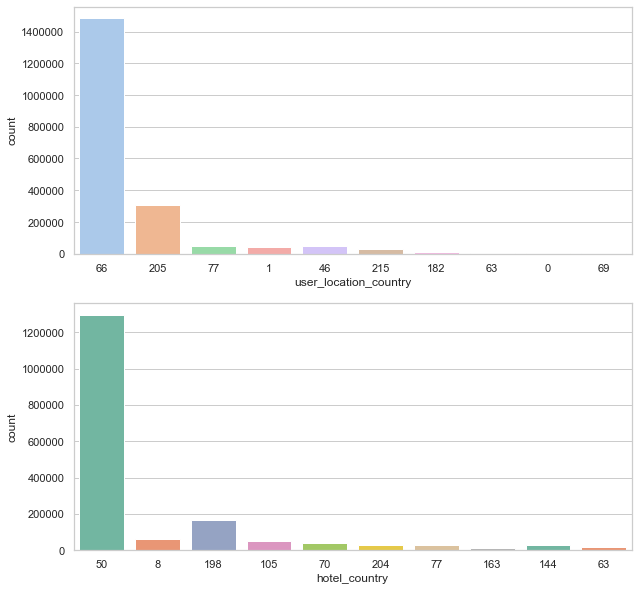

In [4]:
fig, ((axis1,axis2)) = plt.subplots(2,1,figsize=(10,10))


sns.countplot('user_location_country', data = booked, order=train_data['user_location_country'].value_counts().iloc[:10].index,ax=axis1)
sns.countplot('hotel_country', data = booked, palette='Set2',order=train_data['hotel_country'].value_counts().iloc[:10].index)

plt.savefig('plots/booked_user_location_country_cnt.jpg',bbox_inches='tight')

print("User country 66:\t", len(booked[booked['user_location_country']==66]))
print("User country 205:\t", len(booked[booked['user_location_country']==205]))

print("Hotel country 50:\t", len(booked[booked['hotel_country']==50]))
print("Hotel country 198:\t", len(booked[booked['hotel_country']==198]))


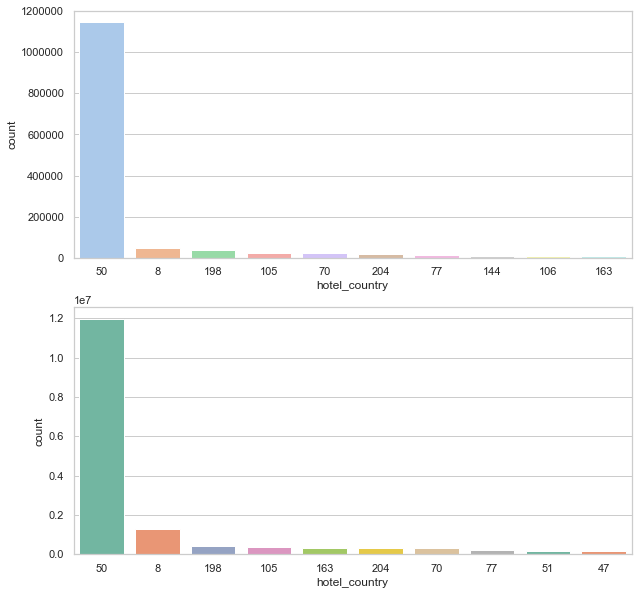

In [5]:
country_id = 66

fig, ((axis1,axis2)) = plt.subplots(2,1,figsize=(10,10))

country_customers_booked = booked[booked['user_location_country']==country_id]
country_customers = train_data[train_data['user_location_country']==country_id]

sns.countplot('hotel_country', data = country_customers_booked, order=country_customers_booked['hotel_country'].value_counts().iloc[:10].index,ax=axis1)
sns.countplot('hotel_country', data = country_customers, palette='Set2',order=country_customers['hotel_country'].value_counts().iloc[:10].index,ax=axis2)

plt.savefig('plots/from_hotel_country66.jpg',bbox_inches='tight')


Posa continent 3:		 21919801
Booked from posa continent 3:	 1823964
Hotel continent 2:		 15487235
Booked to hotel continent 2:	 1459937


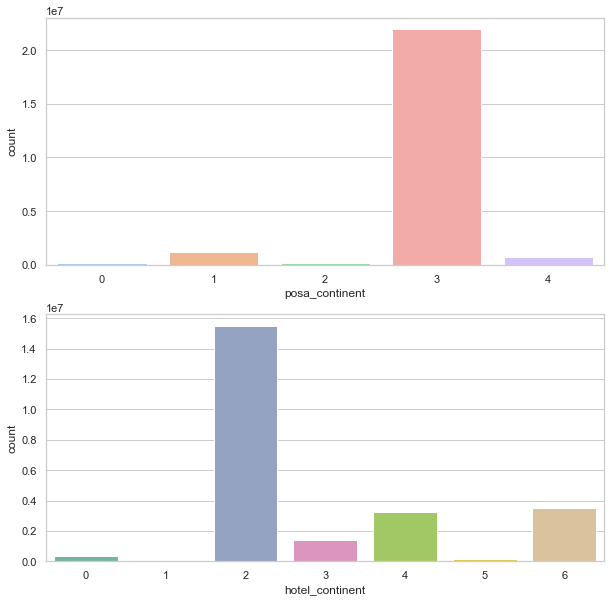

In [6]:
fig, ((axis1,axis2)) = plt.subplots(2,1,figsize=(10,10))

sns.countplot('posa_continent', data=train_data,ax=axis1)
sns.countplot('hotel_continent', data=train_data,palette="Set2",ax=axis2)

plt.savefig('plots/booked_user_location_continent.jpg',bbox_inches='tight')

print("Posa continent 3:\t\t", len(train_data[train_data['posa_continent']==3]))
print("Booked from posa continent 3:\t", len(booked[booked['posa_continent']==3]))

print("Hotel continent 2:\t\t", len(train_data[train_data['hotel_continent']==2]))
print("Booked to hotel continent 2:\t", len(booked[booked['hotel_continent']==2]))


91:	 829368
91:	 98550


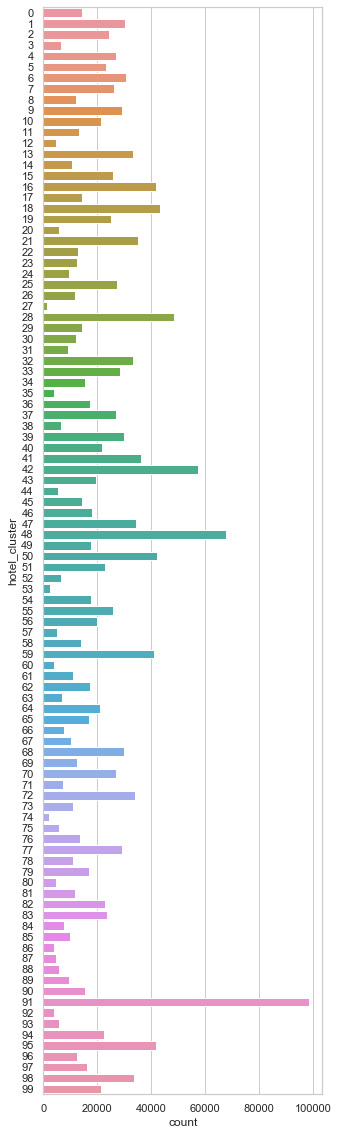

In [7]:
plt.figure(figsize=(5,20))

sns.countplot(y=booked["hotel_cluster"])

plt.savefig('plots/hotel_cluster_count.jpg',bbox_inches='tight')

print("91:\t", len(train_data[train_data['hotel_cluster']==91]))
print("91:\t", len(booked[booked['hotel_cluster']==91]))

Hotel continent 2:		 14000141
Booked to hotel continent 2:	 1228081


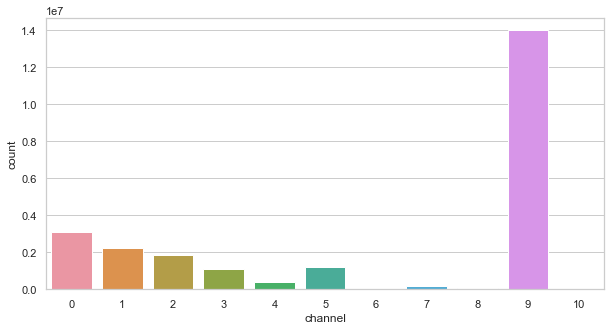

In [8]:
plt.figure(figsize=(10,5))

sns.countplot(x='channel', data=train_data)

plt.savefig('plots/channel_count.jpg',bbox_inches='tight')

print("Hotel continent 2:\t\t", len(train_data[train_data['channel']==9]))
print("Booked to hotel continent 2:\t", len(booked[booked['channel']==9]))


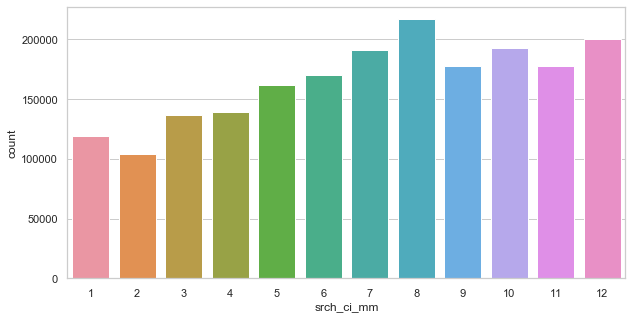

In [9]:
plt.figure(figsize=(10,5))

sns.countplot('srch_ci_mm',data=booked)

plt.savefig('plots/srch_ci_mm_count.jpg',bbox_inches='tight')

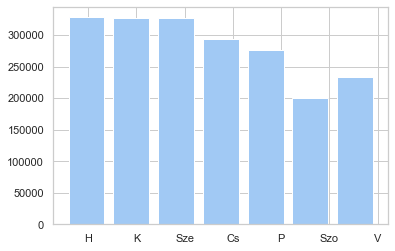

In [10]:
plt.hist(booked.dow, bins = 7, range = (-.5, 6), rwidth = .8)
plt.xticks(range(7), 'H K Sze Cs P Szo V'.split())
plt.savefig('plots/weekdays.jpg',bbox_inches='tight')

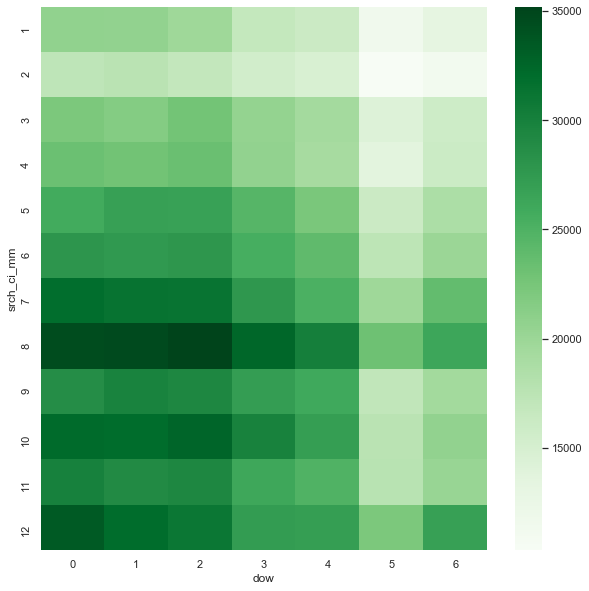

In [11]:
def count_rows(rows):
    return len(rows)

axis = booked.groupby('srch_ci_mm dow'.split()).apply(count_rows).unstack()
axis.fillna(0, inplace = True)
fig, ax = plt.subplots(figsize = (10,10))  
sns.heatmap(axis, cmap = "Greens")

plt.savefig('plots/srch_ci_mm_x_dow.jpg',bbox_inches='tight')

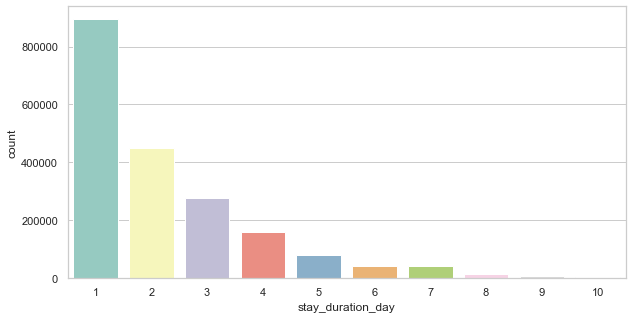

In [12]:
plt.figure(figsize=(10, 5))
sns.countplot('stay_duration_day', data=booked,order=booked['stay_duration_day'].value_counts().iloc[:10].index,palette='Set3')

plt.savefig('plots/stay_duration_day.jpg',bbox_inches='tight')

1 people click:		 4149722
2 people click:		 12978184
4 people click:		 3001371
1 people booked:	 554823
2 people booked:	 953440
4 people booked:	 191596


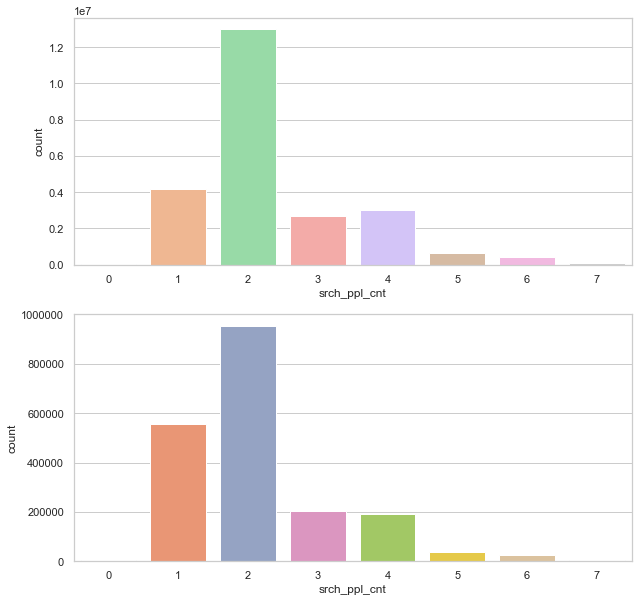

In [13]:
fig, ((axis1,axis2)) = plt.subplots(2,1,figsize=(10,10))

sns.countplot(x='srch_ppl_cnt', order=list(range(0,8)), data=train_data,ax=axis1)
sns.countplot(x='srch_ppl_cnt', order=list(range(0,8)), palette='Set2',data=booked,ax=axis2)

plt.savefig('plots/srch_ppl_cnt_count.jpg',bbox_inches='tight')

print("1 people click:\t\t", len(train_data[train_data['srch_ppl_cnt']==1]))
print("2 people click:\t\t", len(train_data[train_data['srch_ppl_cnt']==2]))
print("4 people click:\t\t", len(train_data[train_data['srch_ppl_cnt']==4]))

print("1 people booked:\t", len(booked[booked['srch_ppl_cnt']==1]))
print("2 people booked:\t", len(booked[booked['srch_ppl_cnt']==2]))
print("4 people booked:\t", len(booked[booked['srch_ppl_cnt']==4]))


### Plots with the original data

In [15]:
train = pd.read_csv('data/train.csv', delimiter=',')

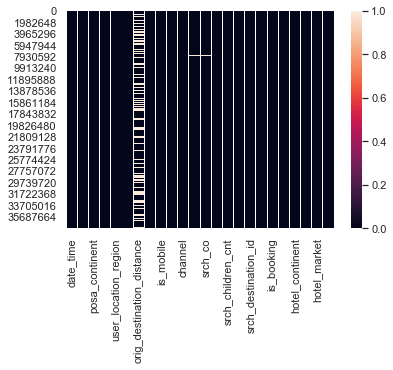

In [16]:
sns.heatmap(train.isnull())
plt.savefig("plots/nan_columns_train.jpg", bbox_inches="tight")

In [17]:
print(sum(pd.isnull(train['orig_destination_distance'])))
print(sum(pd.isnull(train['srch_ci'])))
print(sum(pd.isnull(train['srch_co'])))

13525001
47083
47084


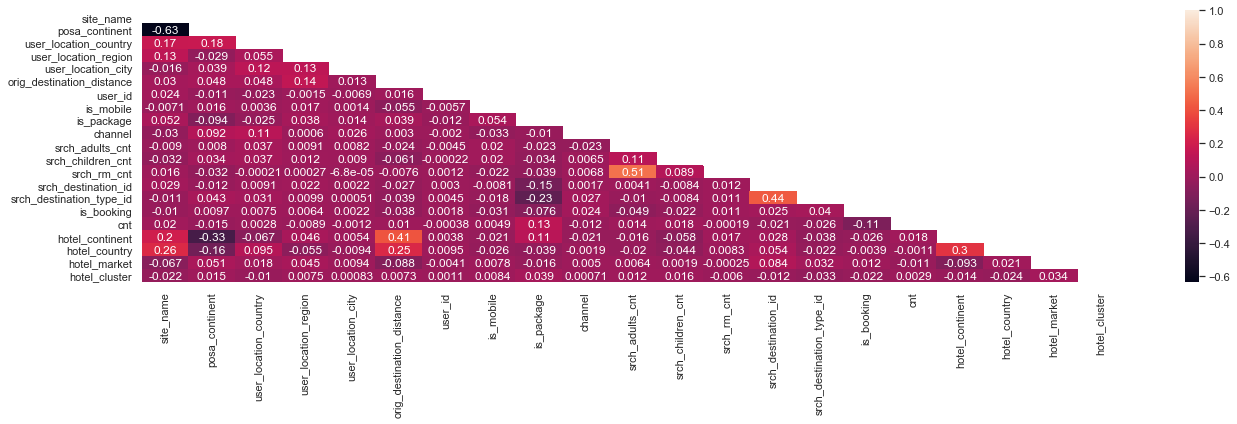

In [18]:
mask = np.zeros_like(train.corr(),dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(22,5))
sns.heatmap(train.corr(), annot=True, mask=mask)

plt.savefig('plots/corr.jpg',bbox_inches='tight')